# Plotting Galaxy Cluster Member Colors in Extragalactic Catalogs

Owners: **Dan Korytov [@dkorytov](https://github.com/LSSTDESC/DC2-analysis/issues/new?body=@dkorytov)**

Last verified run: Nov 30, 2018 (by @yymao)

This notebook demonstrates how to access the extra galactic catalog through the Generic Catalog Reader (GCR, https://github.com/yymao/generic-catalog-reader) as well as how filter on galaxy features and cluster membership.

__Objectives__:

After working through and studying this Notebook you should be able to

1. Access extragalactic catalogs (protoDC2, cosmoDC2) through the GCR
2. Filter on galaxy properties
3. Select and plot cluster members


__Logistics__: This notebook is intended to be run through the JupyterHub NERSC interface available here: https://jupyter-dev.nersc.gov. To setup your NERSC environment, please follow the instructions available here: https://confluence.slac.stanford.edu/display/LSSTDESC/Using+Jupyter-dev+at+NERSC

In [1]:
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline

In [2]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [3]:
data = gc.get_quantities(['halo_mass', 'redshift',
                        'mag_u', 'mag_g', 'mag_r', 
                        'mag_i', 'mag_z'], filters=['halo_mass > 3e13'])

### Reading catalog
We load in the catalog with the "load_catalog" command, and then the values with the "get_quantities" command using filters to select sub-samples of the catalog. For this case we only need the magnitudes in several filters and the redshift. Galaxies are filtered on host halo mass to be at least 3e13 h$^{-1}$M$_\odot$.

### Help for error messages:
If this fails to find the appropriate quantities, check that the desc-python kernel is being used and if this is not available source the kernels by running the following command on a terminal at nersc: "source /global/common/software/lsst/common/miniconda/setup_current_python.sh"

We are loading in a smaller version of the full cosmoDC2 catalog - this contains the same information as the full catalog but with a smaller sky area.

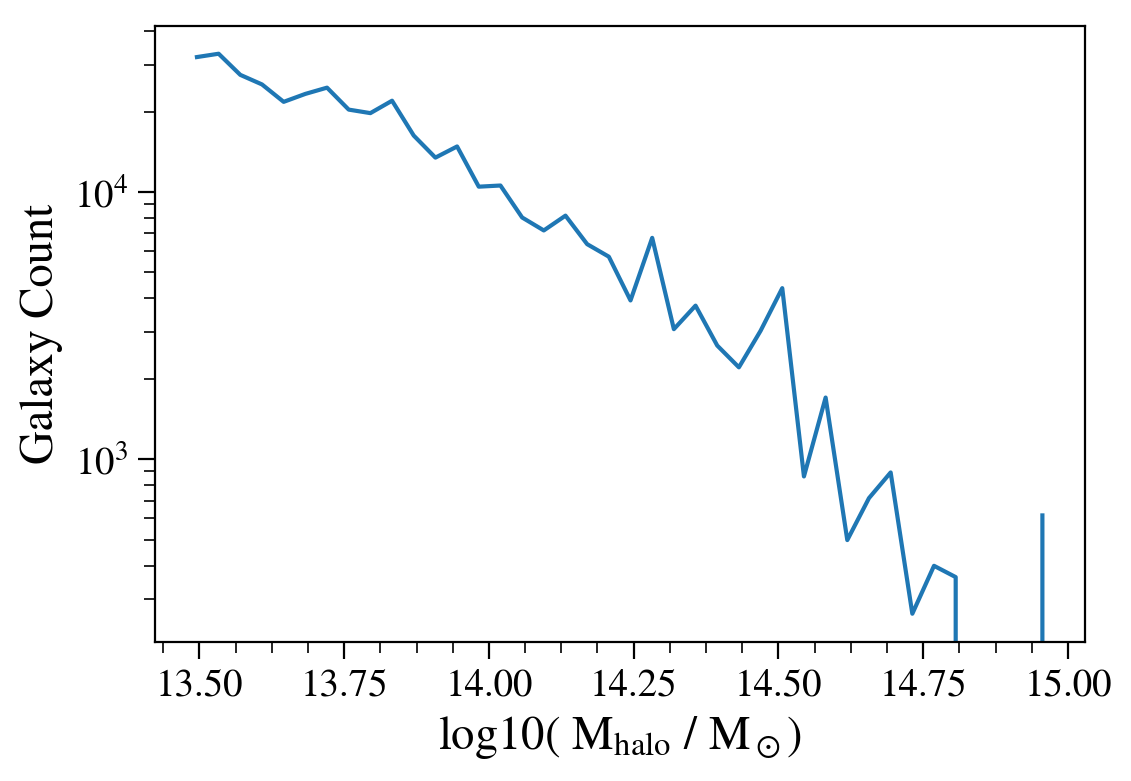

In [4]:
plt.figure()
h,xbins = np.histogram(np.log10(data['halo_mass']),bins=40)
xbins_avg = (xbins[1:]+xbins[:-1])/2.0
plt.semilogy(xbins_avg, h)
plt.ylabel(r'Galaxy Count')
plt.xlabel(r'log10( M$_{\rm{halo}}$ / M$_\odot)$')
plt.show()

As a sanity check, we made sure no galaxies have a host halo below 3e13 h$^{-1}$ M$_\odot$.

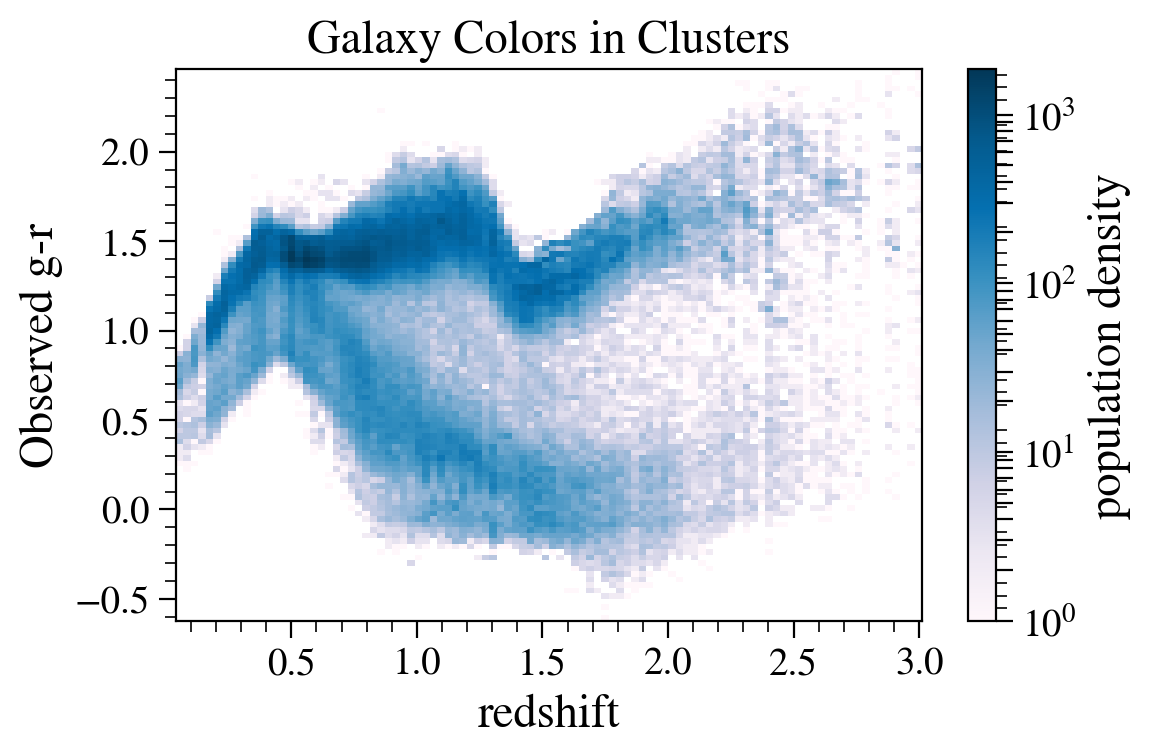

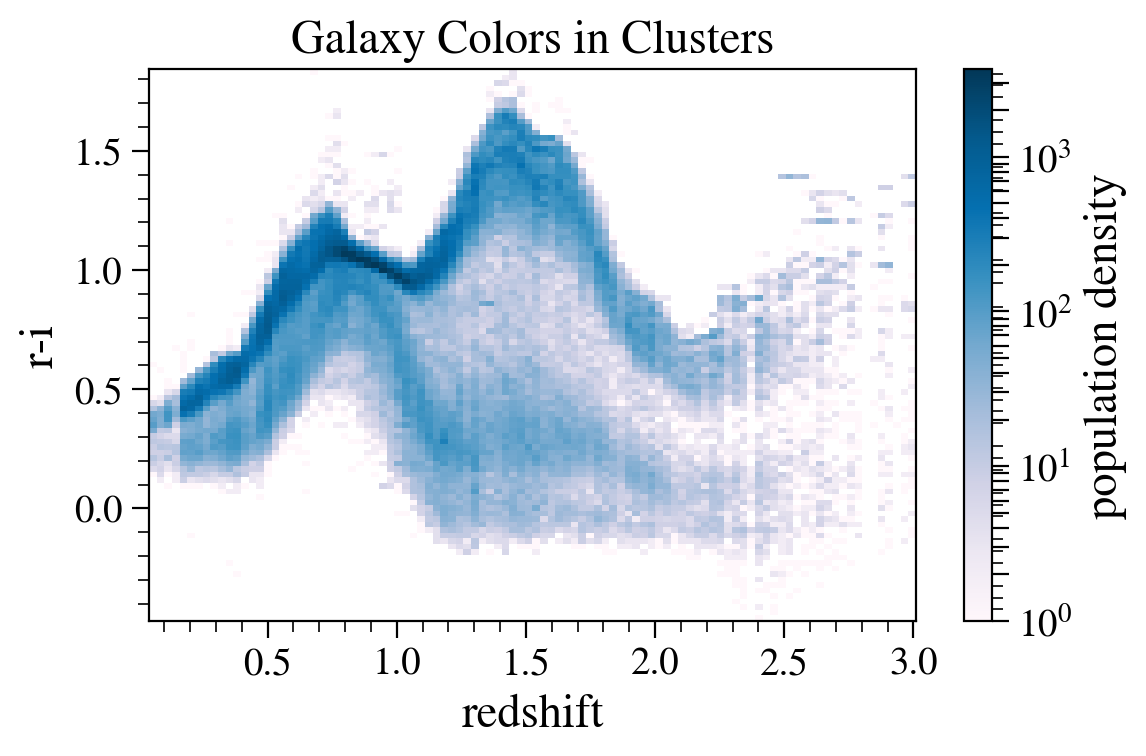

In [5]:
plt.figure()
gal_clr = data['mag_g']-data['mag_r']
plt.hist2d(data['redshift'], gal_clr, bins=100, cmap='PuBu', norm=clr.LogNorm())
plt.colorbar(label='population density')
plt.ylabel('Observed g-r')
plt.xlabel('redshift')
plt.title('Galaxy Colors in Clusters')
plt.tight_layout()

plt.figure()
gal_clr = data['mag_r']-data['mag_i']
plt.hist2d(data['redshift'], gal_clr, bins=100, cmap='PuBu',norm=clr.LogNorm())
plt.colorbar(label='population density')
plt.ylabel('r-i')
plt.xlabel('redshift')
plt.title('Galaxy Colors in Clusters')
plt.tight_layout()
plt.show()

After load the catalog and data, we are able to plot the color distribution as a function of redshift for cluster galaxies with very little effort!